# Tokenize.ipynb
2020/02/23

# KoNLPy 설치하기
### KonLPy를 구동하기 위해서는 1) JDK 설치, 2) 환경변수 설정, 3) JPype1 설치가 되어야 하며, 조금만 잘못 되어도 구동이 안되므로 이하의 링크를 잘 읽고 설치해야 함
- KoNLPy 설치하기: https://konlpy-ko.readthedocs.io/ko/v0.4.3/install/#id2
- [Error 해결] python Konlpy 패키지 설치법: https://0dood0.tistory.com/53
- [JAVA] 자바 환경변수 설정 (윈도우10): https://macchiato.tistory.com/9
- python -V 명령을 통해 본인의 python version을 확인한 후 자신의 version과 컴퓨터환경(bit수)에  맞는 jpype 파일을 설치: 'pip install 파일명'
- 파이썬 한글 형태소 분석기 KoNLPy 설치방법 및 에러 해결: https://ellun.tistory.com/46
- No matching overloads found for: https://github.com/konlpy/konlpy/issues/291

# 예제1
- KoNLPy: 파이썬 한국어 NLP: : https://konlpy-ko.readthedocs.io/ko/v0.4.3/
    - 박은정, 조성준, “KoNLPy: 쉽고 간결한 한국어 정보처리 파이썬 패키지”, 제 26회 한글 및 한국어 정보처리 학술대회 논문집, 2014.
- konlpy : 텍스트 분석하기: https://cossmos.tistory.com/38

In [33]:
from konlpy.tag import Kkma
from konlpy.utils import pprint
 
kkma = Kkma()

In [34]:
# 문장 추출
text = '오늘 날씨가 따뜻합니다 내일은 눈이 온다고 합니까 모레는 오늘보다 춥습'
sentences = kkma.sentences(text)
pprint(sentences)

['오늘 날씨가 따뜻합니다', '내일은 눈이 온다고 합니까', '모레는 오늘보다 춥습']


In [35]:
# 명사 추출
text = '오늘 날씨가 따뜻합니다 내일은 눈이 온다고 합니까 모레는 오늘보다 춥습'
nouns = kkma.nouns(text)
pprint(nouns)

['오늘', '날씨', '내일', '눈', '모레', '춥습']


In [36]:
# 형태소 추출
text = '오늘 날씨가 따뜻합니다 내일은 눈이 온다고 합니까 모레는 오늘보다 춥습'
morphs = kkma.morphs(text)
pprint(morphs)

['오늘',
 '날씨',
 '가',
 '따뜻',
 '하',
 'ㅂ니다',
 '내일',
 '은',
 '눈',
 '이',
 '오',
 'ㄴ다고',
 '하',
 'ㅂ니까',
 '모레',
 '는',
 '오늘',
 '보다',
 '춥습']


In [37]:
# 형태소 추출과 형태소 구분
text = '오늘 날씨가 따뜻합니다 내일은 눈이 온다고 합니까 모레는 오늘보다 춥습'
tag = kkma.pos(text)
pprint(tag)

[('오늘', 'NNG'),
 ('날씨', 'NNG'),
 ('가', 'JKS'),
 ('따뜻', 'XR'),
 ('하', 'XSA'),
 ('ㅂ니다', 'EFN'),
 ('내일', 'NNG'),
 ('은', 'JX'),
 ('눈', 'NNG'),
 ('이', 'JKS'),
 ('오', 'VV'),
 ('ㄴ다고', 'ECE'),
 ('하', 'VV'),
 ('ㅂ니까', 'EFQ'),
 ('모레', 'NNG'),
 ('는', 'JX'),
 ('오늘', 'NNG'),
 ('보다', 'JKM'),
 ('춥습', 'UN')]


# 예제2
- kkma 한글 형태소 분석 후 워드클라우드 생성: https://ankiwoong.site/255

In [58]:
from konlpy.tag import Kkma
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

kkma = Kkma()

In [44]:
# TXT 파일 로드
text = ''
with open("대한민국헌법.txt",encoding="utf-8") as f:
    text = f.read()

In [47]:
# 명사 추출
nouns = kkma.nouns(text)
print(nouns)

['대한', '대한민국', '대한민국헌법', '민국', '헌법', '시행', '1988', '2', '25', '제', '제10호', '10', '호', '1987', '29', '전부', '전부개정', '개정', '유', '유구한', '구한', '역사', '전통', '우리', '국민', '3', '1', '1운동', '운동', '건립', '대한민국임시정부', '임시', '정부', '법통', '불의', '항거', '4', '19', '19민주이념', '민주', '이념', '계승', '조국', '민주개혁', '개혁', '평화적', '통일', '사명', '입각', '정의', '인도', '동포애', '민족', '단결', '사회적', '폐습', '타파', '자율', '조화', '바탕', '자유', '자유민주적', '민주적', '기본', '기본질서', '질서', '정치', '경제', '사회', '문화', '영역', '각인', '기회', '균등', '균등히', '히', '능력', '최고', '최고도로', '도로', '발휘', '권리', '책임', '의무', '완수', '안', '국민생활', '생활', '향상', '밖', '항구적', '세계', '세계평화', '평화', '인류', '인류공영', '공영', '이바지', '우리', '자손', '안전', '행복', '확보', '다짐', '1948', '1948년', '년', '7', '7월', '월', '12', '12일', '일', '제정', '8', '8차', '차', '이제', '국회', '의결', '국민투표', '투표', '저', '1장', '장', '강', '제1조', '조', '민주공화국', '공화국', '주권', '권력', '2조', '요건', '법률', '국가', '바', '재외', '재외국민', '보호', '3조', '조', '영토', '한반도', '부속', '4조', '지향', '정책', '수립', '추진', '5', '5조', '국제', '국제평화', '유지', '노력', '침략', '전쟁', '부인', '국

In [46]:
# 명사 중에 길이가 1이상인 것만 추출
words = []
for n in nouns:
    if len(n) > 1:
        words.append(n)
print(words)

['대한', '대한민국', '대한민국헌법', '민국', '헌법', '시행', '1988', '25', '제10호', '10', '1987', '29', '전부', '전부개정', '개정', '유구한', '구한', '역사', '전통', '우리', '국민', '1운동', '운동', '건립', '대한민국임시정부', '임시', '정부', '법통', '불의', '항거', '19', '19민주이념', '민주', '이념', '계승', '조국', '민주개혁', '개혁', '평화적', '통일', '사명', '입각', '정의', '인도', '동포애', '민족', '단결', '사회적', '폐습', '타파', '자율', '조화', '바탕', '자유', '자유민주적', '민주적', '기본', '기본질서', '질서', '정치', '경제', '사회', '문화', '영역', '각인', '기회', '균등', '균등히', '능력', '최고', '최고도로', '도로', '발휘', '권리', '책임', '의무', '완수', '국민생활', '생활', '향상', '항구적', '세계', '세계평화', '평화', '인류', '인류공영', '공영', '이바지', '우리', '자손', '안전', '행복', '확보', '다짐', '1948', '1948년', '7월', '12', '12일', '제정', '8차', '이제', '국회', '의결', '국민투표', '투표', '1장', '제1조', '민주공화국', '공화국', '주권', '권력', '2조', '요건', '법률', '국가', '재외', '재외국민', '보호', '3조', '영토', '한반도', '부속', '4조', '지향', '정책', '수립', '추진', '5조', '국제', '국제평화', '유지', '노력', '침략', '전쟁', '부인', '국군은', '군은', '안전보장', '보장', '국토', '국토방위', '방위', '신성', '수행', '정치적', '중립성', '준수', '6조', '체결', '공포', '조약', '일반적', '승인', '

In [49]:
# 빈도수 계산
count = Counter(words)
print(count)

Counter({'우리': 2, '대한': 1, '대한민국': 1, '대한민국헌법': 1, '민국': 1, '헌법': 1, '시행': 1, '1988': 1, '25': 1, '제10호': 1, '10': 1, '1987': 1, '29': 1, '전부': 1, '전부개정': 1, '개정': 1, '유구한': 1, '구한': 1, '역사': 1, '전통': 1, '국민': 1, '1운동': 1, '운동': 1, '건립': 1, '대한민국임시정부': 1, '임시': 1, '정부': 1, '법통': 1, '불의': 1, '항거': 1, '19': 1, '19민주이념': 1, '민주': 1, '이념': 1, '계승': 1, '조국': 1, '민주개혁': 1, '개혁': 1, '평화적': 1, '통일': 1, '사명': 1, '입각': 1, '정의': 1, '인도': 1, '동포애': 1, '민족': 1, '단결': 1, '사회적': 1, '폐습': 1, '타파': 1, '자율': 1, '조화': 1, '바탕': 1, '자유': 1, '자유민주적': 1, '민주적': 1, '기본': 1, '기본질서': 1, '질서': 1, '정치': 1, '경제': 1, '사회': 1, '문화': 1, '영역': 1, '각인': 1, '기회': 1, '균등': 1, '균등히': 1, '능력': 1, '최고': 1, '최고도로': 1, '도로': 1, '발휘': 1, '권리': 1, '책임': 1, '의무': 1, '완수': 1, '국민생활': 1, '생활': 1, '향상': 1, '항구적': 1, '세계': 1, '세계평화': 1, '평화': 1, '인류': 1, '인류공영': 1, '공영': 1, '이바지': 1, '자손': 1, '안전': 1, '행복': 1, '확보': 1, '다짐': 1, '1948': 1, '1948년': 1, '7월': 1, '12': 1, '12일': 1, '제정': 1, '8차': 1, '이제': 1, '국회': 1, '의결': 1, '국민투표': 1,

In [50]:
# 상위 100건 추출
most = count.most_common(100)
print(most)

[('우리', 2), ('대한', 1), ('대한민국', 1), ('대한민국헌법', 1), ('민국', 1), ('헌법', 1), ('시행', 1), ('1988', 1), ('25', 1), ('제10호', 1), ('10', 1), ('1987', 1), ('29', 1), ('전부', 1), ('전부개정', 1), ('개정', 1), ('유구한', 1), ('구한', 1), ('역사', 1), ('전통', 1), ('국민', 1), ('1운동', 1), ('운동', 1), ('건립', 1), ('대한민국임시정부', 1), ('임시', 1), ('정부', 1), ('법통', 1), ('불의', 1), ('항거', 1), ('19', 1), ('19민주이념', 1), ('민주', 1), ('이념', 1), ('계승', 1), ('조국', 1), ('민주개혁', 1), ('개혁', 1), ('평화적', 1), ('통일', 1), ('사명', 1), ('입각', 1), ('정의', 1), ('인도', 1), ('동포애', 1), ('민족', 1), ('단결', 1), ('사회적', 1), ('폐습', 1), ('타파', 1), ('자율', 1), ('조화', 1), ('바탕', 1), ('자유', 1), ('자유민주적', 1), ('민주적', 1), ('기본', 1), ('기본질서', 1), ('질서', 1), ('정치', 1), ('경제', 1), ('사회', 1), ('문화', 1), ('영역', 1), ('각인', 1), ('기회', 1), ('균등', 1), ('균등히', 1), ('능력', 1), ('최고', 1), ('최고도로', 1), ('도로', 1), ('발휘', 1), ('권리', 1), ('책임', 1), ('의무', 1), ('완수', 1), ('국민생활', 1), ('생활', 1), ('향상', 1), ('항구적', 1), ('세계', 1), ('세계평화', 1), ('평화', 1), ('인류', 1), ('인류공영', 1), ('공영',

In [54]:
# 딕셔너리 구성
tags = {}
for n,c in most:
    tags[n] = c
print(tags)

{'우리': 2, '대한': 1, '대한민국': 1, '대한민국헌법': 1, '민국': 1, '헌법': 1, '시행': 1, '1988': 1, '25': 1, '제10호': 1, '10': 1, '1987': 1, '29': 1, '전부': 1, '전부개정': 1, '개정': 1, '유구한': 1, '구한': 1, '역사': 1, '전통': 1, '국민': 1, '1운동': 1, '운동': 1, '건립': 1, '대한민국임시정부': 1, '임시': 1, '정부': 1, '법통': 1, '불의': 1, '항거': 1, '19': 1, '19민주이념': 1, '민주': 1, '이념': 1, '계승': 1, '조국': 1, '민주개혁': 1, '개혁': 1, '평화적': 1, '통일': 1, '사명': 1, '입각': 1, '정의': 1, '인도': 1, '동포애': 1, '민족': 1, '단결': 1, '사회적': 1, '폐습': 1, '타파': 1, '자율': 1, '조화': 1, '바탕': 1, '자유': 1, '자유민주적': 1, '민주적': 1, '기본': 1, '기본질서': 1, '질서': 1, '정치': 1, '경제': 1, '사회': 1, '문화': 1, '영역': 1, '각인': 1, '기회': 1, '균등': 1, '균등히': 1, '능력': 1, '최고': 1, '최고도로': 1, '도로': 1, '발휘': 1, '권리': 1, '책임': 1, '의무': 1, '완수': 1, '국민생활': 1, '생활': 1, '향상': 1, '항구적': 1, '세계': 1, '세계평화': 1, '평화': 1, '인류': 1, '인류공영': 1, '공영': 1, '이바지': 1, '자손': 1, '안전': 1, '행복': 1, '확보': 1, '다짐': 1, '1948': 1, '1948년': 1, '7월': 1, '12': 1, '12일': 1, '제정': 1, '8차': 1}


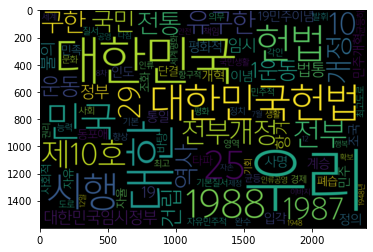

In [73]:
# 워드클라우드 생성
wc = WordCloud(font_path=r"C:\Program Files (x86)\Hnc\Office 2018\HOffice100\Shared\TTF\All\HANYoonGothic720.ttf",width=1200, height=800, scale=2.0, max_font_size=250)
                                                                                        ## font_path 지정을 잘해주어야 함
gen = wc.generate_from_frequencies(tags)

plt.figure()
plt.imshow(gen, interpolation='bilinear')
wc.to_file("korean.png")
#plt.close()